In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tools.misc_tools import create_KS_data

In [3]:
T = 2000
t0 = 0.0
delta_t = 0.1
L = 35
numpoints_xgrid = 100
xgrid = np.linspace(0, L, numpoints_xgrid)
params_mat = np.array([
    [1, 1, 1]
]) # [x1*, x4*, C, beta, gamma, b]
init_state_mat = np.array([
    [0.2*(2*(i%2 - 0.5)) for i in range(numpoints_xgrid)]
])

In [4]:
res_dict = create_KS_data(
    T, t0, delta_t, xgrid,
    init_state_mat, params_mat=params_mat,
    return_params_arr=False,
    normalize=False, M_Cauchy=32, alldata_withparams=False,
    stddev_multiplier_for_norm=None
)

In [9]:
all_data = res_dict['all_data']
boundary_idx_arr = res_dict['boundary_idx_arr']

In [6]:
new_data = all_data[int(0//delta_t):, 0:numpoints_xgrid]

In [23]:
def plot(
        boundary_idx_arr,
        delta_t,
        all_data,
        xgrid,
        xticks_snapto=20,
        num_yticks=11,
        cmap='viridis',
        return_fig=False,
    ):

    n = len(boundary_idx_arr)
    # '''
    num_cols = 1
    num_rows = 1
    factor = 1
    # fig = plt.figure(figsize=(7.5*num_cols, 7.5*num_rows))

    num_modes = xgrid.shape[0]

    prev_idx = 0
    fig_arr = []
    for i in range(len(boundary_idx_arr)):
        next_idx = boundary_idx_arr[i]
        fig, ax = plt.subplots(figsize=(factor*7.5*num_cols, factor*5.0*num_rows))
        N = next_idx - prev_idx
        input_time = np.arange(0, N)*delta_t

        im = ax.imshow(all_data[prev_idx:next_idx, 0:num_modes].transpose(), aspect='auto', origin='lower', cmap=cmap)
        num_xticks = 1 + int((N*delta_t + 0.5*xticks_snapto) // xticks_snapto)
        # xticks = np.linspace(0, N, num_xticks, dtype=np.int32)
        xticks = np.arange(0, N, int((xticks_snapto+0.5*delta_t)//delta_t))
        ax.set_xticks(ticks=xticks)
        ax.set_xticklabels(np.round(xticks*delta_t, 1))
        ax.tick_params(axis='x', rotation=270+45)

        yticks = np.linspace(0, 1, num_yticks)*(len(xgrid)-1)
        yticklabels = np.round(np.linspace(0, 1, yticks.shape[0])*xgrid[-1], 2)
        ax.set_yticks(ticks=yticks)
        ax.set_yticklabels(yticklabels)

        ax.set_xlabel('Time')
        ax.set_ylabel(r'$x$')
        # ax.title.set_text(r'Latent States')

        plt.colorbar(im)
        plt.show()
        print('')

        prev_idx = next_idx
        fig_arr.append(fig)
        
    if return_fig == True:
        return fig_arr

    # '''

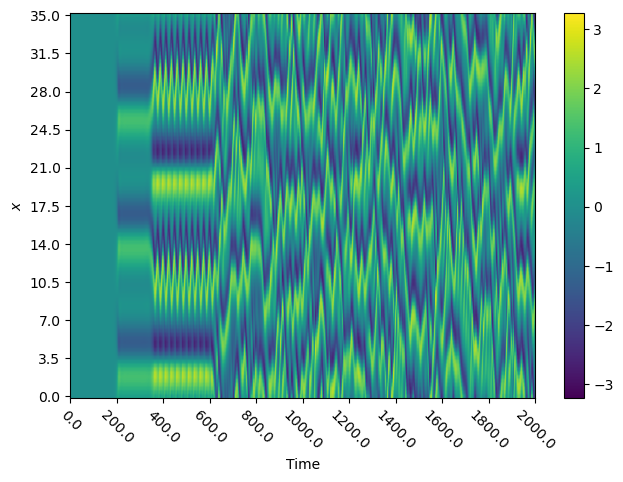

In [21]:
plot(
    boundary_idx_arr,
    delta_t,
    all_data,
    xgrid,
    xticks_snapto=int(40*np.round((T//10)/40))
)

In [18]:
new_data = all_data[int(1600//delta_t):, 0:numpoints_xgrid]

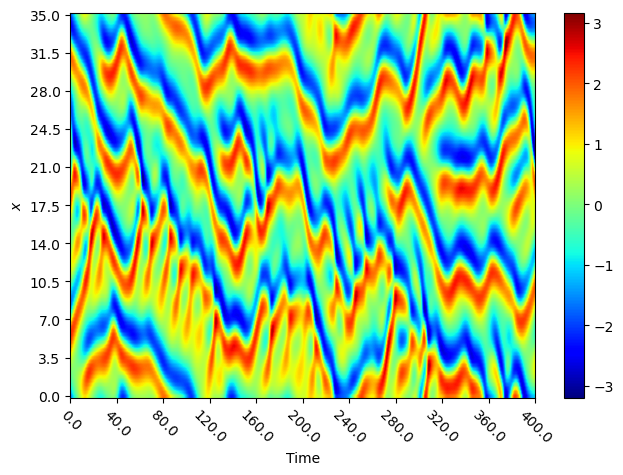

In [25]:
fig_arr = plot(
    np.array([new_data.shape[0]]),
    delta_t,
    new_data,
    xgrid,
    xticks_snapto=int(40*np.round((new_data.shape[0]*delta_t//10)/40)),
    cmap='jet',
    return_fig=True
)

In [26]:
fig_arr[0].savefig('ks_time_evolution.png', dpi=300, bbox_inches='tight')